In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [4]:
df = pd.read_csv('houseprice.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
cols = df.columns
columns = list(cols)
columns

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [6]:
le = LabelEncoder()
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object

In [7]:
X = df.drop("price",axis = 1)

In [8]:
Y = df['price']

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [10]:
X_train.shape

(436, 12)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_test


array([[ 0.57805349,  1.39405543,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.25076755],
       [ 0.8817534 ,  0.05527092,  1.53917323, ..., -0.80305867,
         1.80956067, -1.40940148],
       [-0.43868103, -1.28351359, -0.5579503 , ..., -0.80305867,
        -0.55262032, -0.07931697],
       ...,
       [ 0.63087086,  1.39405543,  1.53917323, ...,  0.36795665,
        -0.55262032, -0.07931697],
       [ 0.63087086,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032, -0.07931697],
       [ 0.69689258,  0.05527092,  1.53917323, ...,  1.53897197,
         1.80956067, -1.40940148]])

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train,Y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
mse = mean_squared_error(Y_test,y_pred)

In [18]:
mse

1304.408525425669

In [19]:
rmse = np.sqrt(mse)

In [20]:
rmse

36.116596260246745

In [21]:
r2_score(Y_test,y_pred)

0.679293543551378

In [22]:
b = model.intercept_
b

94.4288990825688

In [23]:
a  = model.coef_
a

array([18.87546667,  2.4020785 , 13.72150265, 10.90342316,  4.33027195,
        2.66584844,  6.9449305 ,  4.72434533, 10.12814285,  3.92828483,
        8.4116807 , -5.88495287])

In [27]:
correlation = df.corr()

<Axes: >

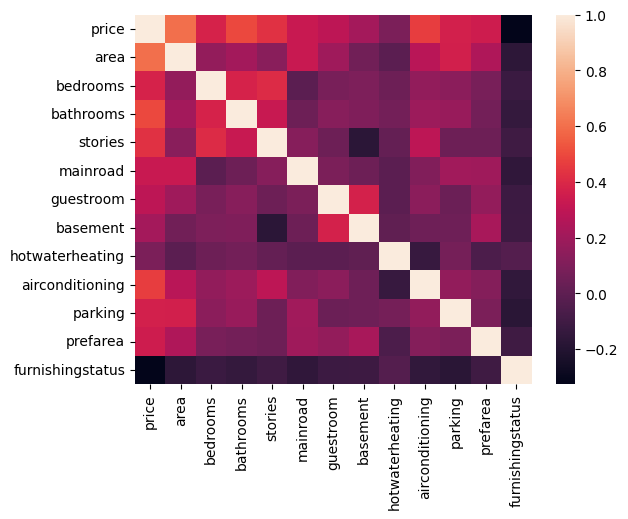

In [29]:
import seaborn as sns
sns.heatmap(correlation)
